# Dataset from UCI

* The dataset has 13 attributes which describe the Dress
* We have the Recommendation attribute which we need to predict
* https://archive.ics.uci.edu/ml/datasets/Dresses_Attribute_Sales
# Make duplicate copy and then delete parts here

In [10]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import os

df_org = pd.read_csv("Attribute Dataset.xlsx")

In [12]:
df_org.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,unknown,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,unknown,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,unknown,unknown,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [103]:
# Check if we have imbalanced classes

df_org.Recommendation.value_counts()

0    290
1    210
Name: Recommendation, dtype: int64

In [13]:
df_org.shape

(500, 14)

In [6]:
# Check for nulls
df_org.isnull().sum()

Dress_ID          0
Style             0
Price             2
Rating            0
Size              0
Season            2
NeckLine          1
SleeveLength      0
waiseline         1
Material          1
FabricType        1
Decoration        1
Pattern Type      1
Recommendation    0
dtype: int64

In [ ]:
df = df_org

In [29]:
# Remove nulls as it is just couple of rows

df = df.dropna(axis=0)
df.shape

# We had only 4 rows with nulls which is less than 1% of the data

(496, 14)

In [ ]:
# Use LabelEncoder to convert text to numbers

from sklearn.preprocessing import LabelEncoder

Encdr = LabelEncoder()
# list_label = [1-24 numbers use for inverse tansform]
df.Style = Encdr.fit_transform(df.Style.values)
df.Price = Encdr.fit_transform(df.Price.values)
df.Size = Encdr.fit_transform(df.Size.values)
df.Season = Encdr.fit_transform(df.Season.values)
df.NeckLine = Encdr.fit_transform(df.NeckLine.values)
df.SleeveLength = Encdr.fit_transform(df.SleeveLength.values)
df.waiseline = Encdr.fit_transform(df.waiseline.values)
df.Material = Encdr.fit_transform(df.Material.values)
df.FabricType = Encdr.fit_transform(df.FabricType.values)
df.Decoration = Encdr.fit_transform(df.Decoration.values)
df['Pattern Type'] = Encdr.fit_transform(df['Pattern Type'].values)


In [31]:
print(df.Style.unique())

array([ 5,  1, 11,  0,  7,  6,  3,  2,  9, 10, 12,  4,  8], dtype=int64)

In [32]:
df.Price.unique()

array([2, 1, 0, 3, 6, 5, 4], dtype=int64)

In [33]:
df.Price.value_counts()

0    251
2    128
5     45
3     30
6     21
4     15
1      6
Name: Price, dtype: int64

In [36]:
# list(Encdr.inverse_transform([0,11])) ?

['animal', 'solid']

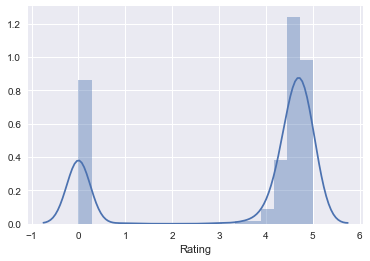

In [40]:
# Plot Histogram fro Rating

sns.distplot(df['Rating'])
plt.show()

In [41]:
df['Rating'].value_counts()

0.0    119
4.7     84
4.8     55
5.0     55
4.6     54
4.5     33
4.4     27
4.9     25
4.3     20
4.0      7
4.2      6
4.1      5
3.7      2
3.6      1
3.0      1
1.0      1
3.5      1
Name: Rating, dtype: int64

In [43]:
ratng_tabl = pd.crosstab(df['Rating'],df['Recommendation'])
print(ratng_tabl)

Recommendation   0   1
Rating                
0.0             72  47
1.0              1   0
3.0              1   0
3.5              1   0
3.6              0   1
3.7              1   1
4.0              5   2
4.1              1   4
4.2              2   4
4.3             12   8
4.4             21   6
4.5             21  12
4.6             28  26
4.7             50  34
4.8             33  22
4.9             13  12
5.0             27  28


In [65]:
# Define function to Bin Rating
def RatingBin(R):
    if R > 4.5:
        return 3
    elif R > 4:
        return 2
    elif R > 1:
        return 1
    else:
        return 0

In [71]:
RatingBin(.9)

0

In [ ]:
df['Rating_Bin'] = df['Rating']

In [80]:
df.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation,Rating_Bin
0,1006032852,5,2,4.6,1,3,7,10,1,21,3,19,0,1,4.6
1,1212192089,1,2,0.0,0,3,7,0,2,8,19,19,0,0,0.0
2,1190380701,11,1,0.0,0,0,7,4,2,15,19,23,10,0,0.0
3,966005983,0,0,4.6,0,2,7,4,2,18,3,8,10,1,4.6
4,876339541,7,2,4.5,1,3,7,1,2,2,3,3,2,0,4.5


In [ ]:
# Convert Rating to Cateforical as all other Variables and Dependent Var. is also Categorical
df['Rating_Bin'] = df['Rating_Bin'].apply(RatingBin)

In [83]:
df['Rating_Bin'].unique()

array([3, 0, 2, 1], dtype=int64)

In [84]:
ratngbin_tabl = pd.crosstab(df['Rating_Bin'],df['Recommendation'])
print(ratngbin_tabl)

Recommendation    0    1
Rating_Bin              
0                73   47
1                 8    4
2                57   34
3               151  122


### Observation from above

* We can clearly see that in Bin value = 3 a lot of them were Recommended, which is rating > 4.5

In [89]:
# Create Features vector X
X = df.iloc[:,0:15]
X.drop(['Rating', 'Dress_ID'], axis=1)
X.head()

# Create Dependent Var. y

y = df.Recommendation

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation,Rating_Bin
0,1006032852,5,2,4.6,1,3,7,10,1,21,3,19,0,1,3
1,1212192089,1,2,0.0,0,3,7,0,2,8,19,19,0,0,0
2,1190380701,11,1,0.0,0,0,7,4,2,15,19,23,10,0,0
3,966005983,0,0,4.6,0,2,7,4,2,18,3,8,10,1,3
4,876339541,7,2,4.5,1,3,7,1,2,2,3,3,2,0,2


# Model Selection

* We use BernoulliNB as this is for Binary Categorical Variables

In [95]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 1)

In [98]:
from sklearn.naive_bayes import BernoulliNB

#Create a BernoulliNB Classifier
Classifier = BernoulliNB()

# Train the model using the training sets 
Classifier.fit(X_train, y_train)

y_pred=Classifier.predict(X_test)


## Model Evaluation

In [99]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

## Print detailed Classification report
clss_rpt = metrics.classification_report(y_test, y_pred)
print(clss_rpt)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        57
          1       1.00      1.00      1.00        43

avg / total       1.00      1.00      1.00       100



## Conclusion

* Both classes have been classified perfectly with zero error
* We see that this is a perfect case where all metrics are 1
* This dataset was mainly meant for practise
* In real world we would probably never see such a case
* We can also plot ROC curve but here the result would be 1 anyway